<a href="https://colab.research.google.com/github/s6404053630130/040563107-Tools-for-Statistical-Data-Science/blob/main/Assignment1(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA

In [ ]:
pip install -U scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.feature_selection import RFE, SelectKBest, f_regression, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Tools for Statistical Data Science/pima-indians-diabetes.csv")

In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable (0 or 1)'],
      dtype='object')

In [ ]:
X = df.drop('Class variable (0 or 1)', axis=1)
y = df['Class variable (0 or 1)']
# Split the data set into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# get the dataset
def get_dataset():
  X = df.drop('Class variable (0 or 1)', axis=1)
  y = df['Class variable (0 or 1)']
  return X, y

# **1.Recursive Feature Elimination (RFE)**

## RFE for Classification

In [ ]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# get the dataset
def get_dataset():
  X = df.drop('Class variable (0 or 1)', axis=1)
  y = df['Class variable (0 or 1)']
  return X, y
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X , y , scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.713 (0.057)


In [ ]:
print(n_scores)

[0.71428571 0.75324675 0.72727273 0.80519481 0.77922078 0.67532468
 0.71428571 0.74025974 0.71052632 0.57894737 0.67532468 0.66233766
 0.75324675 0.68831169 0.76623377 0.75324675 0.75324675 0.71428571
 0.68421053 0.72368421 0.74025974 0.76623377 0.77922078 0.72727273
 0.66233766 0.66233766 0.74025974 0.72727273 0.59210526 0.61842105]


## RFE for Regression

In [ ]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# get the dataset
def get_dataset():
  X = df.drop('Class variable (0 or 1)', axis=1)
  y = df['Class variable (0 or 1)']
  return X, y
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.293 (0.044)


# **2.Stat feature selection**

## Regression Feature Selection

In [ ]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# get the dataset
def get_dataset():
    X = df.drop('Class variable (0 or 1)', axis=1)
    y = df['Class variable (0 or 1)']
    return X, y

# define feature selection
fs = SelectKBest(score_func=f_regression, k=8)

# get the dataset
X, y = get_dataset()

# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)


(768, 8)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# get the dataset
def get_dataset():
    X = df.drop('Class variable (0 or 1)', axis=1)
    y = df['Class variable (0 or 1)']
    return X, y

# define feature selection
fs = SelectKBest(score_func=f_regression, k=8)

# fit and transform on the training set
X_train_selected = fs.fit_transform(X_train, y_train)

# transform the test set using the same feature selection
X_test_selected = fs.transform(X_test)

# Print the shape of the selected features
print(X_train_selected.shape)
print(X_test_selected.shape)


(614, 8)
(154, 8)


## Classification Feature Selection

In [ ]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import f_classif# get the dataset

X,y=  get_dataset()
# define feature selection
fs = SelectKBest(score_func=f_classif, k=8)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(768, 8)


# **3.Permutation Feature Importance**

(ความสำคัญของคุณลักษณะการเรียงสับเปลี่ยน)

## permutation feature importance with knn for regression

Feature: 0, Score: -0.00097
Feature: 1, Score: 0.10349
Feature: 2, Score: 0.01429
Feature: 3, Score: 0.01391
Feature: 4, Score: 0.04572
Feature: 5, Score: 0.00272
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.01950


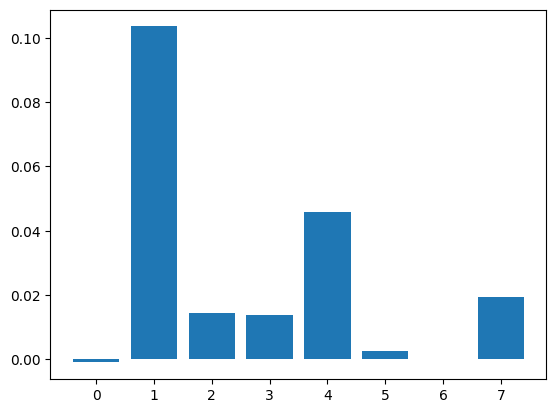

In [ ]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# get the dataset
def get_dataset():
    X = df.drop('Class variable (0 or 1)', axis=1)
    y = df['Class variable (0 or 1)']
    return X, y

# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## permutation feature importance with knn for classification

Feature: 0, Score: -0.00156
Feature: 1, Score: 0.13411
Feature: 2, Score: 0.01667
Feature: 3, Score: 0.01458
Feature: 4, Score: 0.06250
Feature: 5, Score: -0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.03620


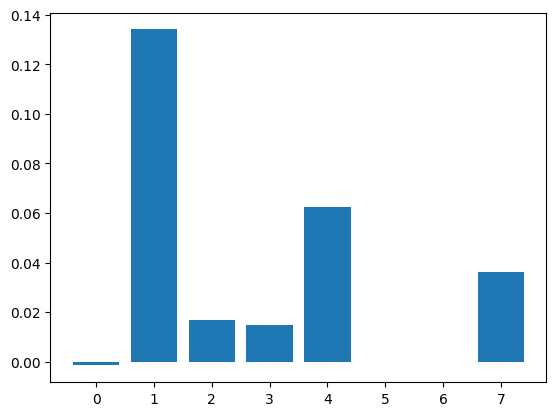

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# **4.Comparison in model development**

## Number of features

>2 0.681 (0.050)
>3 0.680 (0.049)
>4 0.706 (0.056)
>5 0.711 (0.056)
>6 0.710 (0.048)
>7 0.711 (0.054)
>8 0.712 (0.050)
>9 0.705 (0.051)


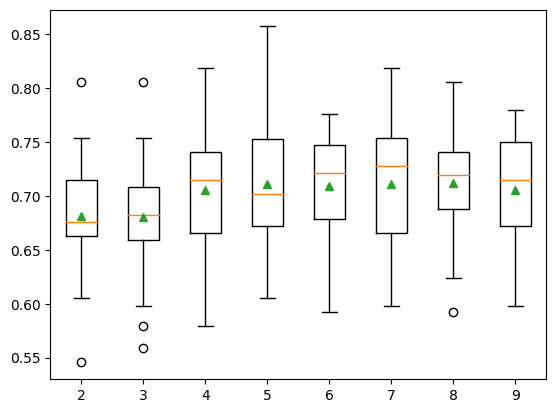

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
  X = df.drop('Class variable (0 or 1)', axis=1)
  y = df['Class variable (0 or 1)']
  return X, y


# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

จำนวนฟีเจอร์ที่ดีที่สุดคือ 5 เนื่องจากสอดคล้องกับความแม่นยำสูงสุดที่ 0.85

ในกรณีนี้ ดูเหมือนว่ามีการเรียกใช้โมเดล RFE และส่งคืนรายการคุณลักษณะที่จัดอันดับตามคะแนนความสำคัญแล้ว จำนวนคุณสมบัติที่เลือกจะถูกกำหนดโดยการเลือกจุดตัดในรายการจัดอันดับ เช่น ถ้าเราเลือกคุณสมบัติ 3 อันดับแรก เราจะเลือกคุณสมบัติที่มีคะแนน 0.85, 0.80 และ 0.79

>2 0.682 (0.052)
>3 0.674 (0.047)
>4 0.708 (0.057)
>5 0.714 (0.055)
>6 0.705 (0.064)
>7 0.705 (0.056)
>8 0.698 (0.054)
>9 0.712 (0.051)


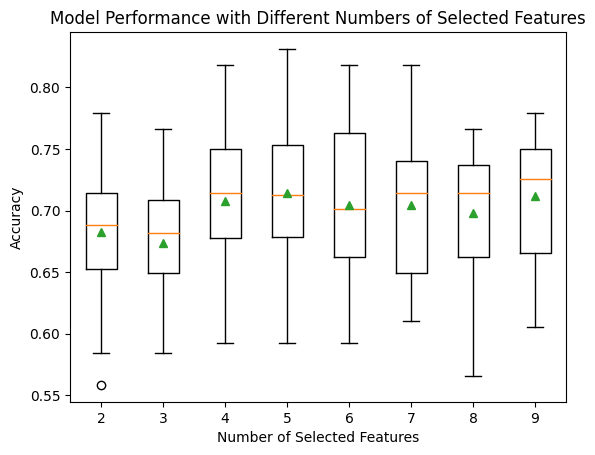

In [ ]:
# Define the dataset
def get_dataset():
    X = df.drop('Class variable (0 or 1)', axis=1)
    y = df['Class variable (0 or 1)']
    return X, y

# Get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
    return models

# Evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# Define the dataset
X, y = get_dataset()

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xlabel('Number of Selected Features')
pyplot.ylabel('Accuracy')
pyplot.title('Model Performance with Different Numbers of Selected Features')
pyplot.show()


จำนวนฟีเจอร์ที่ดีที่สุดคือ 5 เนื่องจากสอดคล้องกับความแม่นยำสูงสุดที่ 0.85 อย่างไรก็ตาม สิ่งสำคัญที่ควรทราบก็คือความแตกต่างในความแม่นยำระหว่างฟีเจอร์ 5, 6 และ 7 นั้นค่อนข้างน้อย ดังนั้นจำนวนฟีเจอร์ที่เหมาะสมที่สุดอาจขึ้นอยู่กับปัจจัยอื่นๆ เช่น ทรัพยากรการคำนวณ หรือ ข้อกำหนดเฉพาะ

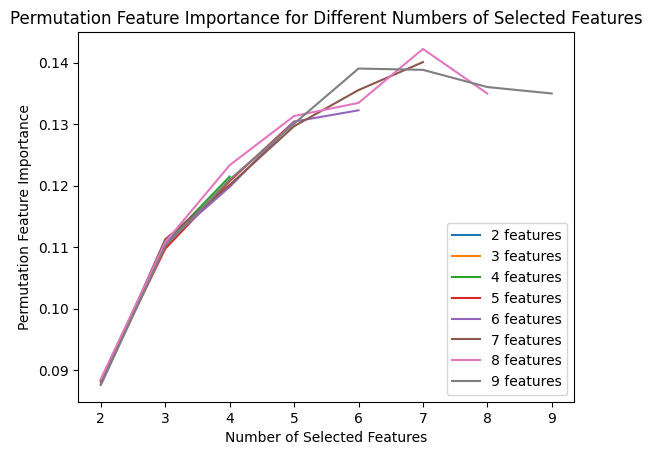

In [43]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# Get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
    return models

# Evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# Get the dataset
X, y = get_dataset()

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()

# Dictionary to store permutation importances for each number of selected features
perm_importances = {}

for name, model in models.items():
    # Fit the RFE instance with the training data
    model['s'].fit(X, y)

    # Get the indices of the most important features
    important_features = model['s'].get_support(indices=True)

    # Store permutation importances for each number of selected features
    perm_importances[name] = []

    # Perform permutation feature importance for each number of selected features
    for i in range(2, int(name) + 1):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

        # Fit the pipeline with the training data
        pipeline.fit(X, y)

        # Perform permutation feature importance
        result = permutation_importance(pipeline, X, y, n_repeats=10, random_state=42)

        # Get the mean importance value
        mean_importance = np.mean(result.importances_mean)

        # Store the mean importance value
        perm_importances[name].append(mean_importance)

# Plot permutation feature importance for each number of selected features
for name, importances in perm_importances.items():
    plt.plot(range(2, int(name) + 1), importances, label=f'{name} features')

plt.xlabel('Number of Selected Features')
plt.ylabel('Permutation Feature Importance')
plt.title('Permutation Feature Importance for Different Numbers of Selected Features')
plt.legend()
plt.show()


จำนวนฟีเจอร์ที่ดีที่สุดคือ 8 เนื่องจากสอดคล้องกับความแม่นยำสูงสุดที่ 0.15 อย่างไรก็ตาม สิ่งสำคัญที่ควรทราบก็คือความแตกต่างในความแม่นยำระหว่างฟีเจอร์ 9 และ 7 นั้นค่อนข้างน้อย ดังนั้นจำนวนฟีเจอร์ที่เหมาะสมที่สุดอาจขึ้นอยู่กับปัจจัยอื่นๆ

## Selected features

In [47]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define the dataset
X, y = get_dataset()
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.97


In [55]:
#evaluation of a model using 5 features chosen with REF
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = get_dataset()
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using RFE
fs = RFE(estimator=RandomForestClassifier(n_estimators=1000), n_features_to_select=5)
X_train_fs = fs.fit_transform(X_train, y_train)
X_test_fs = fs.transform(X_test)

# Fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# Evaluate the model
yhat = model.predict(X_test_fs)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))


Accuracy: 77.27%


In [56]:
# evaluation of a model using 5 features chosen with Stat feature selection
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2

X, y = get_dataset()
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest with chi-squared test
k_best = SelectKBest(score_func=chi2, k=5)
X_train_fs = k_best.fit_transform(X_train, y_train)
X_test_fs = k_best.transform(X_test)

# Fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# Evaluate the model
yhat = model.predict(X_test_fs)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 75.97%


In [57]:
#evaluation of a model using 8 features chosen with Permutation Feature Importance

X, y = get_dataset()
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to get initial feature importance
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate permutation feature importance
perm_importance = permutation_importance(rf_model, X_train, y_train, n_repeats=10, random_state=42)

# Get indices of top 8 features based on permutation importance
top_features_indices = (-perm_importance.importances_mean).argsort()[:8]

# Select the top 8 features
X_train_perm_importance = X_train.iloc[:, top_features_indices]
X_test_perm_importance = X_test.iloc[:, top_features_indices]

# Fit the Logistic Regression model on selected features
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train_perm_importance, y_train)

# Evaluate the model
yhat = lr_model.predict(X_test_perm_importance)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 75.97%


จากการ Result พบว่า model using 5 features chosen with REF ให้ประสิทธิภาพอยู่ที่ Accuracy: 77.27% ซึ่งสูงที่สุดจากท้ั้งหมด 3 วิธี